# Procesamiento de Datos

---

En este archivo se encuentra el análisis exploratorio y procesamiento de datos para el reto: **Descubrimiento de puntos nuevos de venta** dado por Oxxo. Este reto consta de lo siguiente:

*Desarrollar un modelo de predicción que a partir de una ubicación (latitud/longitud) determine si una tienda Oxxo tiene alto potencial de éxito, es decir, cumpla con su meta de venta.*

* *Generar un One-Page del cumplimiento actual de las tiendas.*
* *Desarrollar un modelo de predicción que reciba una ubicación (latitud y longitud) y ciertas características y generé una métrica que ayude a determinar si el punto potencial tiene alto potencial de éxito*
* *Obtener un asertividad mayor al 80% en un grupo de tiendas adicionales que evaluará el modelo.*
* *¿Qué sugerencias o consideraciones podrían hacer para llevar este modelo a otros negocios (tiendas bara, caffenio, farmacias Yza, etc.)?*

Para poder lograr esto, se nos dieron los siguientes archivos:

* DIM_TIENDA_TEST.csv
* DIM_TIENDA.csv
* Meta_venta.csv
* Venta.csv

De cada uno se sabe lo siguiente:

| **table** | **title**	| **type** | **description**
|------|-----------|------------| ------------ 
DIM_TIENDA | TIENDA_ID | string | Hace referencia al código que se utiliza para identificar una  tienda
DIM_TIENDA | PLAZA_CVE	| string | Hace referecia al nombre de la plaza donde esta asignada la tienda
DIM_TIENDA | NIVELSOCIOECONOMICO_DES | string | Hace referencia al promedio del nivel socioeconómico del entorno en que se ubica la tienda
DIM_TIENDA | ENTORNO_DES | string | Hace referencia al entorno en que se ubica la tienda
DIM_TIENDA | MTS2VENTAS_NUM | float | Hace referencia a la medida del área del piso de ventas en la tienda y cuarto frio de exhibición al cliente, el cual es expresado en metros cuadrados (m2)
DIM_TIENDA | PUERTASREFRIG_NUM | float | Hace referencia al número de puertas del cuarto frio
DIM_TIENDA | CAJONESESTACIONAMIENTO_NUM | float | Hace referencia a la cantidad de cajones de estacionamiento de la tienda 
DIM_TIENDA | LATITUD_NUM | float | Hace referencia a la latitud de la tienda
DIM_TIENDA | LONGITUD_NUM | float | Hace referencia a la longitud de la tienda
DIM_TIENDA | SEGMENTO_MAESTRO_DESC | string | Hace refrencia al tipo de segmento a la cual pertenece la tienda
DIM_TIENDA | LID_UBICACION_TIENDA | string | Hace referencia al tipo de ubicación de la tienda
DIM_TIENDA | Dataset | string | Hace referencia al conjunto al que pertenece la tienda TRAIN o TEST
Venta | TIENDA_ID | string | Hace referencia al código que se utiliza para identificar una  tienda
Venta | MES_ID | string | Hace referencia al año y mes
Venta | VENTA_AMT | float | Hace referencia a la venta mensual de la tienda
Meta_Venta | ENTORNO_DES | string | Hace referencia al entorno en que se ubica la tienda
Meta_Venta | Meta_venta | float | Hace referencia a la venta mensual requerida para alcanzar su meta de venta

## Importaciones

---

### Importación de librerías

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Importación de datos

In [297]:
ruta = "C:/Users/danyj/OneDrive/Documents/Datathon/Raw Data"

In [298]:
dim_tienda = pd.read_csv(f"{ruta}/DIM_TIENDA.csv")
dim_tienda

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN
...,...,...,...,...,...,...,...,...,...,...,...,...
946,572,6,C,Hogar,0.00,13,0,25.57330,-100.02196,Hogar Reunión,UT_DENSIDAD,TRAIN
947,492,6,B,Base,0.00,13,0,25.27251,-100.00065,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN
948,172,6,CD,Receso,122.70,8,0,25.19135,-99.81539,Parada Técnica,UT_CARRETERA_GAS,TRAIN
949,748,6,C,Receso,0.00,0,0,25.27433,-100.01648,Parada Técnica,UT_CARRETERA_GAS,TRAIN


In [299]:
venta = pd.read_csv(f"{ruta}/Venta.csv")
venta

,TIENDA_ID,MES_ID,VENTA_TOTAL
0,813,202404,1042761.16
1,742,202404,604946.96
2,436,202404,2486787.81
3,732,202404,680701.78
4,282,202404,1227768.82
...,...,...,...
21376,885,202312,1157010.83
21377,793,202401,699916.91
21378,53,202401,1008108.28
21379,960,202401,1324156.07


In [300]:
meta_venta = pd.read_csv(f"{ruta}/Meta_venta.csv")
meta_venta

,ENTORNO_DES,Meta_venta
0,Base,480000
1,Hogar,490000
2,Peatonal,420000
3,Receso,516000


## Análisis de tablas por separado

---

In [301]:
print(dim_tienda['TIENDA_ID'].nunique())
print(venta['TIENDA_ID'].nunique())

951
1053


In [302]:
tiendas_venta = set()
tiendas_venta.update(venta['TIENDA_ID'].unique())

tiendas_dim = set()
tiendas_dim.update(dim_tienda['TIENDA_ID'].unique())

solo_en_venta = tiendas_venta - tiendas_dim

solo_en_venta = [int(i) for i in solo_en_venta]

print(sorted(solo_en_venta))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050]


## Merge de las tablas *ventas* y *dim_tiendas*

---

In [303]:
df = venta.merge(dim_tienda, on = 'TIENDA_ID', how = 'left')
df = df.merge(meta_venta, on = 'ENTORNO_DES', how = 'left')

#### Creación de la columna 'éxito' con base en las métricas dadas por la tabla meta_venta

In [304]:
df["EXITO"] = (df["VENTA_TOTAL"] >= df["Meta_venta"]).astype(int)

In [305]:
df

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,Meta_venta,EXITO
0,813,202404,1042761.16,2.0,C,Hogar,0.00,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,490000.0,1
1,742,202404,604946.96,5.0,C,Base,130.38,14.0,0.0,25.79436,-100.08207,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
2,436,202404,2486787.81,3.0,BC,Hogar,0.00,13.0,0.0,25.54982,-100.22381,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,490000.0,1
3,732,202404,680701.78,5.0,C,Hogar,118.46,15.0,0.0,25.75866,-100.10849,Parada Técnica,UT_DENSIDAD,TRAIN,490000.0,1
4,282,202404,1227768.82,6.0,BC,Receso,114.00,13.0,0.0,24.85018,-99.57190,Parada Técnica,UT_CARRETERA_GAS,TRAIN,516000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21376,885,202312,1157010.83,2.0,B,Receso,110.15,10.0,9.0,25.98226,-98.09069,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,516000.0,1
21377,793,202401,699916.91,6.0,C,Base,109.40,0.0,0.0,25.19030,-99.81640,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
21378,53,202401,1008108.28,6.0,C,Receso,103.21,12.0,10.0,25.15216,-99.84832,Parada Técnica,UT_CARRETERA_GAS,TRAIN,516000.0,1
21379,960,202401,1324156.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Análisis y procesamiento del dataframe 

Primero que nada, se eliminan los ID de la tabla ventas que no están en la tabla dim_tiendas.

In [306]:
df = df[~df['TIENDA_ID'].isin(solo_en_venta)]

In [307]:
# Dimensión del dataset
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 19253
Número de columnas: 16


In [308]:
# Tipos de datos
df.dtypes

TIENDA_ID                       int64
MES_ID                          int64
VENTA_TOTAL                   float64
PLAZA_CVE                     float64
NIVELSOCIOECONOMICO_DES        object
ENTORNO_DES                    object
MTS2VENTAS_NUM                float64
PUERTASREFRIG_NUM             float64
CAJONESESTACIONAMIENTO_NUM    float64
LATITUD_NUM                   float64
LONGITUD_NUM                  float64
SEGMENTO_MAESTRO_DESC          object
LID_UBICACION_TIENDA           object
DATASET                        object
Meta_venta                    float64
EXITO                           int64
dtype: object

In [309]:
# Valores faltantes por columna
df.isna().sum()

TIENDA_ID                      0
MES_ID                         0
VENTA_TOTAL                    0
PLAZA_CVE                      0
NIVELSOCIOECONOMICO_DES        0
ENTORNO_DES                    0
MTS2VENTAS_NUM                 0
PUERTASREFRIG_NUM              0
CAJONESESTACIONAMIENTO_NUM     0
LATITUD_NUM                    0
LONGITUD_NUM                   0
SEGMENTO_MAESTRO_DESC         97
LID_UBICACION_TIENDA           0
DATASET                        0
Meta_venta                     0
EXITO                          0
dtype: int64

Para poder trabajar la columna 'segmento_maestro_desc' se explorará más acerca de ella.

In [310]:
# Ver los valores faltantes en segmento_maestro_desc
df['SEGMENTO_MAESTRO_DESC'].unique()

array(['Hogar Reunión', 'Parada Técnica', 'Clásico', 'Barrio Competido',
       'Oficinistas', nan], dtype=object)

Se explora la relación con la columna 'entorno_des' ya que puede haber una relación.

In [311]:
# Tabla de frecuencias absolutas
tabla_cruzada = pd.crosstab(df['ENTORNO_DES'], df['SEGMENTO_MAESTRO_DESC'])
print(tabla_cruzada)

# Con porcentajes por fila (qué % de cada entorno va a cada segmento)
tabla_pct_fila = pd.crosstab(df['ENTORNO_DES'], df['SEGMENTO_MAESTRO_DESC'], normalize = 'index') * 100
print(tabla_pct_fila.round(1))

SEGMENTO_MAESTRO_DESC  Barrio Competido  Clásico  Hogar Reunión  Oficinistas  \
ENTORNO_DES                                                                    
Base                                142      432           2141          858   
Hogar                               352      726           9933          240   
Peatonal                              0        0              0           86   
Receso                               42      231            294          793   

SEGMENTO_MAESTRO_DESC  Parada Técnica  
ENTORNO_DES                            
Base                             1026  
Hogar                             377  
Peatonal                           42  
Receso                           1441  
SEGMENTO_MAESTRO_DESC  Barrio Competido  Clásico  Hogar Reunión  Oficinistas  \
ENTORNO_DES                                                                    
Base                                3.1      9.4           46.6         18.7   
Hogar                               3.0

Con esta información, se pueden imputar los valores de manera más lógica.

In [312]:
df[df['SEGMENTO_MAESTRO_DESC'].isna()]

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,Meta_venta,EXITO
194,768,202404,702430.02,6.0,C,Base,0.00,0.0,0.0,25.35691,-100.09469,NaN,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
218,768,202412,301857.77,6.0,C,Base,0.00,0.0,0.0,25.35691,-100.09469,NaN,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,0
231,818,202411,247937.87,6.0,C,Receso,0.00,0.0,0.0,25.56875,-99.98240,NaN,UT_CARRETERA_GAS,TRAIN,516000.0,0
254,818,202412,113237.47,6.0,C,Receso,0.00,0.0,0.0,25.56875,-99.98240,NaN,UT_CARRETERA_GAS,TRAIN,516000.0,0
268,772,202411,1053685.29,5.0,C,Hogar,89.60,15.0,0.0,25.79316,-100.18115,NaN,UT_DENSIDAD,TRAIN,490000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20392,829,202406,613182.60,4.0,C,Hogar,115.45,14.0,0.0,25.65830,-100.09820,NaN,UT_DENSIDAD,TRAIN,490000.0,1
20533,772,202402,1096821.26,5.0,C,Hogar,89.60,15.0,0.0,25.79316,-100.18115,NaN,UT_DENSIDAD,TRAIN,490000.0,1
20603,772,202403,1332895.34,5.0,C,Hogar,89.60,15.0,0.0,25.79316,-100.18115,NaN,UT_DENSIDAD,TRAIN,490000.0,1
20898,786,202306,12442.34,6.0,C,Hogar,0.00,0.0,0.0,25.28290,-100.00320,NaN,UT_DENSIDAD,TRAIN,490000.0,0


In [313]:
# Imputar según la frecuencia observada entre la relación de estas columnas
df.loc[(df['ENTORNO_DES'] == 'Base') & (df['SEGMENTO_MAESTRO_DESC'].isna()), 'SEGMENTO_MAESTRO_DESC'] = 'Reunión'

df.loc[(df['ENTORNO_DES'] == 'Hogar') & (df['SEGMENTO_MAESTRO_DESC'].isna()), 'SEGMENTO_MAESTRO_DESC'] = 'Reunión'

df.loc[(df['ENTORNO_DES'] == 'Receso') & (df['SEGMENTO_MAESTRO_DESC'].isna()), 'SEGMENTO_MAESTRO_DESC'] = 'Parada Técnica'

Siguiendo con el análisis, podemos observar que en la tabla hay tiendas que tienen 0 $m^2$ como medida al piso de venta al cliente. A nuestro parecer, esto no puede ser posible, ya que buscando algunos ejemplos se observa que estas tiendas sí cuentan con un piso de venta. 

Igualmente este mismo criterio aplica a la variable 'puertasrefrig_num' y 'venta_total'.

Analizaremos más a fondo:

#### 1. VENTAS_TOTAL

In [314]:
df[df['VENTA_TOTAL'] == 0]

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,Meta_venta,EXITO
6679,367,202401,0.0,3.0,C,Receso,0.0,10.0,0.0,25.64841,-100.28547,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,516000.0,0


In [315]:
# Quitar el único registro con venta = 0
df = df.drop(df[df['VENTA_TOTAL'] == 0].index)

#### 2. MTS2VENTAS_NUM

In [316]:
df[df['MTS2VENTAS_NUM'] == 0]

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,Meta_venta,EXITO
0,813,202404,1042761.16,2.0,C,Hogar,0.0,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,490000.0,1
2,436,202404,2486787.81,3.0,BC,Hogar,0.0,13.0,0.0,25.54982,-100.22381,Clásico,UT_TRAFICO_VEHICULAR,TRAIN,490000.0,1
15,498,202404,750797.40,6.0,B,Base,0.0,13.0,0.0,25.28060,-100.01745,Oficinistas,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
20,539,202404,1398000.78,6.0,B,Base,0.0,13.0,0.0,25.69036,-99.24230,Parada Técnica,UT_CARRETERA_GAS,TRAIN,480000.0,1
31,452,202404,869599.47,3.0,C,Base,0.0,13.0,0.0,25.62589,-100.27324,Clásico,UT_GAS_URBANA,TRAIN,480000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,488,202401,615381.03,4.0,B,Hogar,0.0,13.0,0.0,25.61455,-100.17592,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1
21359,104,202401,475361.15,4.0,C,Hogar,0.0,13.0,0.0,25.66592,-100.09583,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,0
21363,242,202401,768042.49,3.0,BC,Receso,0.0,8.0,0.0,25.65538,-100.29421,Oficinistas,UT_GAS_URBANA,TRAIN,516000.0,1
21371,1053,202311,810727.58,2.0,C,Hogar,0.0,0.0,0.0,26.04132,-98.29259,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1


In [317]:
df[df['MTS2VENTAS_NUM'] == 0]['TIENDA_ID'].nunique()

264

Aquí podemos ver que hay 5014 filas con valor 0 en 'MTS2VENTAS_NUM', las cuales pertenecen a un total de 264 IDs. Se imputará un mismo valor por ID en esta columna usando KNN.

In [318]:
# Crear dataset único por tienda
tiendas_unicas = df.drop_duplicates(subset=['TIENDA_ID']).copy()

# Agregar promedio de ventas por tienda
ventas_promedio = df.groupby('TIENDA_ID')['VENTA_TOTAL'].mean().reset_index()
ventas_promedio.columns = ['TIENDA_ID', 'VENTA_AMT_promedio']
tiendas_unicas = tiendas_unicas.merge(ventas_promedio, on = 'TIENDA_ID', how = 'left')

df_knn = tiendas_unicas.copy()

# Encoding de categóricas
categoricas = ['PLAZA_CVE', 'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC', 'LID_UBICACION_TIENDA']
le_dict = {}

for col in categoricas:
   le = LabelEncoder()
   df_knn[col + '_encoded'] = le.fit_transform(df_knn[col].astype(str))
   le_dict[col] = le

# Features para KNN
features_knn = ['PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_AMT_promedio',
               'PLAZA_CVE_encoded', 'NIVELSOCIOECONOMICO_DES_encoded', 'ENTORNO_DES_encoded', 
               'SEGMENTO_MAESTRO_DESC_encoded', 'LID_UBICACION_TIENDA_encoded']

# Matriz para KNN (incluye la columna target)
matriz_knn = df_knn[features_knn + ['MTS2VENTAS_NUM']].copy()

# Reemplazar 0s por NaN en la columna target
matriz_knn.loc[matriz_knn['MTS2VENTAS_NUM'] == 0, 'MTS2VENTAS_NUM'] = np.nan

# Escalar features numéricas
scaler = StandardScaler()
cols_numericas = ['PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_AMT_promedio']
matriz_knn[cols_numericas] = scaler.fit_transform(matriz_knn[cols_numericas])

# Aplicar KNN
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
matriz_imputada = knn_imputer.fit_transform(matriz_knn)

# Obtener valores imputados
df_knn['MTS2VENTAS_NUM_knn'] = matriz_imputada[:, -1]

# Identificar tiendas que necesitan imputación
tiendas_cero = df_knn[df_knn['MTS2VENTAS_NUM'] == 0].copy()

# Validación híbrida por grupos
for idx in tiendas_cero.index:
   tienda_actual = df_knn.loc[idx]
   valor_knn = tienda_actual['MTS2VENTAS_NUM_knn']
   
   # Buscar grupo similar (mismo segmento y ubicación)
   grupo = df_knn[
       (df_knn['SEGMENTO_MAESTRO_DESC'] == tienda_actual['SEGMENTO_MAESTRO_DESC']) &
       (df_knn['LID_UBICACION_TIENDA'] == tienda_actual['LID_UBICACION_TIENDA']) &
       (df_knn['MTS2VENTAS_NUM'] > 0)
   ]
   
   if len(grupo) >= 3:
       q25 = grupo['MTS2VENTAS_NUM'].quantile(0.25)
       q75 = grupo['MTS2VENTAS_NUM'].quantile(0.75)
       
       # Si KNN está fuera del rango, usar mediana del grupo
       if not (q25 <= valor_knn <= q75):
           valor_final = grupo['MTS2VENTAS_NUM'].median()
       else:
           valor_final = valor_knn
   else:
       # Si no hay suficientes datos del grupo, usar KNN
       valor_final = valor_knn
   
   df_knn.loc[idx, 'MTS2VENTAS_NUM'] = valor_final

# Diccionario de mapeo
mapeo_areas = df_knn.set_index('TIENDA_ID')['MTS2VENTAS_NUM'].to_dict()

# Aplicar a dataset completo
df['MTS2VENTAS_NUM'] = df['TIENDA_ID'].map(mapeo_areas)

#### 3. PUERTASREFRIG_NUM

In [319]:
df[df['PUERTASREFRIG_NUM'] == 0]

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,Meta_venta,EXITO
0,813,202404,1042761.16,2.0,C,Hogar,108.360000,0.0,0.0,25.99200,-98.11400,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,490000.0,1
18,789,202404,805440.86,1.0,C,Hogar,100.700000,0.0,0.0,25.71404,-100.17443,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1
33,817,202404,769182.56,2.0,C,Receso,104.777497,0.0,0.0,26.08866,-98.27988,Oficinistas,UT_TRAFICO_PEATONAL,TRAIN,516000.0,1
34,1038,202404,946015.78,2.0,C,Hogar,132.730000,0.0,11.0,26.05081,-98.40391,Barrio Competido,UT_DENSIDAD,TRAIN,490000.0,1
36,662,202404,1858795.84,6.0,C,Receso,114.751036,0.0,0.0,25.45501,-100.15735,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,516000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21328,697,202401,760163.89,4.0,C,Base,108.360000,0.0,0.0,25.64114,-100.15849,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
21331,1041,202401,1692701.01,2.0,B,Hogar,110.980112,0.0,0.0,25.98343,-98.09802,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1
21336,615,202401,676907.57,6.0,C,Base,108.360000,0.0,0.0,25.19016,-99.83539,Hogar Reunión,UT_TRAFICO_VEHICULAR,TRAIN,480000.0,1
21371,1053,202311,810727.58,2.0,C,Hogar,111.750000,0.0,0.0,26.04132,-98.29259,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1


In [320]:
df[df['PUERTASREFRIG_NUM'] == 0]['TIENDA_ID'].nunique()

194

Al igual que con la columna 'MTS2VENTAS_NUM', se aplicará la misma técnica de imputación.

In [321]:
# Dataset único por tienda 
tiendas_unicas = df.drop_duplicates(subset=['TIENDA_ID']).copy()

# Agregar promedio de ventas por tienda
ventas_promedio = df.groupby('TIENDA_ID')['VENTA_TOTAL'].mean().reset_index()
ventas_promedio.columns = ['TIENDA_ID', 'VENTA_AMT_promedio']
tiendas_unicas = tiendas_unicas.merge(ventas_promedio, on = 'TIENDA_ID', how = 'left')

# Preparar datos para KNN
df_knn = tiendas_unicas.copy()

# Encoding de categóricas
categoricas = ['PLAZA_CVE', 'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES', 'SEGMENTO_MAESTRO_DESC', 'LID_UBICACION_TIENDA']
le_dict = {}

for col in categoricas:
    le = LabelEncoder()
    df_knn[col + '_encoded'] = le.fit_transform(df_knn[col].astype(str))
    le_dict[col] = le

# Features para KNN (ahora MTS2VENTAS_NUM es predictor, no target)
features_knn = ['MTS2VENTAS_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_AMT_promedio',
                'PLAZA_CVE_encoded', 'NIVELSOCIOECONOMICO_DES_encoded', 'ENTORNO_DES_encoded', 
                'SEGMENTO_MAESTRO_DESC_encoded', 'LID_UBICACION_TIENDA_encoded']

# Crear matriz para KNN
matriz_knn = df_knn[features_knn + ['PUERTASREFRIG_NUM']].copy()

# Reemplazar 0s por NaN en PUERTASREFRIG_NUM
matriz_knn.loc[matriz_knn['PUERTASREFRIG_NUM'] == 0, 'PUERTASREFRIG_NUM'] = np.nan

# Escalar features numéricas
scaler = StandardScaler()
cols_numericas = ['MTS2VENTAS_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_AMT_promedio']
matriz_knn[cols_numericas] = scaler.fit_transform(matriz_knn[cols_numericas])

# Aplicar KNN
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
matriz_imputada = knn_imputer.fit_transform(matriz_knn)

# Obtener valores imputados
df_knn['PUERTASREFRIG_NUM_knn'] = matriz_imputada[:, -1]

# Identificar tiendas que necesitan imputación
tiendas_cero_puertas = df_knn[df_knn['PUERTASREFRIG_NUM'] == 0].copy()

# Validación por grupos
for idx in tiendas_cero_puertas.index:
    tienda_actual = df_knn.loc[idx]
    valor_knn = tienda_actual['PUERTASREFRIG_NUM_knn']
    
    grupo = df_knn[
        (df_knn['SEGMENTO_MAESTRO_DESC'] == tienda_actual['SEGMENTO_MAESTRO_DESC']) &
        (df_knn['LID_UBICACION_TIENDA'] == tienda_actual['LID_UBICACION_TIENDA']) &
        (df_knn['PUERTASREFRIG_NUM'] > 0)
    ]
    
    if len(grupo) >= 3:
        q25 = grupo['PUERTASREFRIG_NUM'].quantile(0.25)
        q75 = grupo['PUERTASREFRIG_NUM'].quantile(0.75)
        
        if not (q25 <= valor_knn <= q75):
            valor_final = grupo['PUERTASREFRIG_NUM'].median()
        else:
            valor_final = valor_knn
    else:
        valor_final = valor_knn
    
    # Redondear a entero (las puertas son números enteros)
    df_knn.loc[idx, 'PUERTASREFRIG_NUM'] = round(valor_final)

# Crear diccionario de mapeo
mapeo_puertas = df_knn.set_index('TIENDA_ID')['PUERTASREFRIG_NUM'].to_dict()

# Aplicar a dataset completo
df['PUERTASREFRIG_NUM'] = df['TIENDA_ID'].map(mapeo_puertas)

### Análisis posteriores

In [322]:
# Cantidad de valores únicos por columna
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

TIENDA_ID: 948
MES_ID: 21
VENTA_TOTAL: 19250
PLAZA_CVE: 6
NIVELSOCIOECONOMICO_DES: 7
ENTORNO_DES: 4
MTS2VENTAS_NUM: 666
PUERTASREFRIG_NUM: 13
CAJONESESTACIONAMIENTO_NUM: 16
LATITUD_NUM: 933
LONGITUD_NUM: 940
SEGMENTO_MAESTRO_DESC: 6
LID_UBICACION_TIENDA: 5
DATASET: 1
Meta_venta: 4
EXITO: 2


In [323]:
# Verificar duplicados en el dataset
duplicados_completos = df.duplicated() # Todas las columnas son idénticas
print(f"Duplicados completos: {duplicados_completos.sum()}")

Duplicados completos: 0


## Verificación de outliers

---

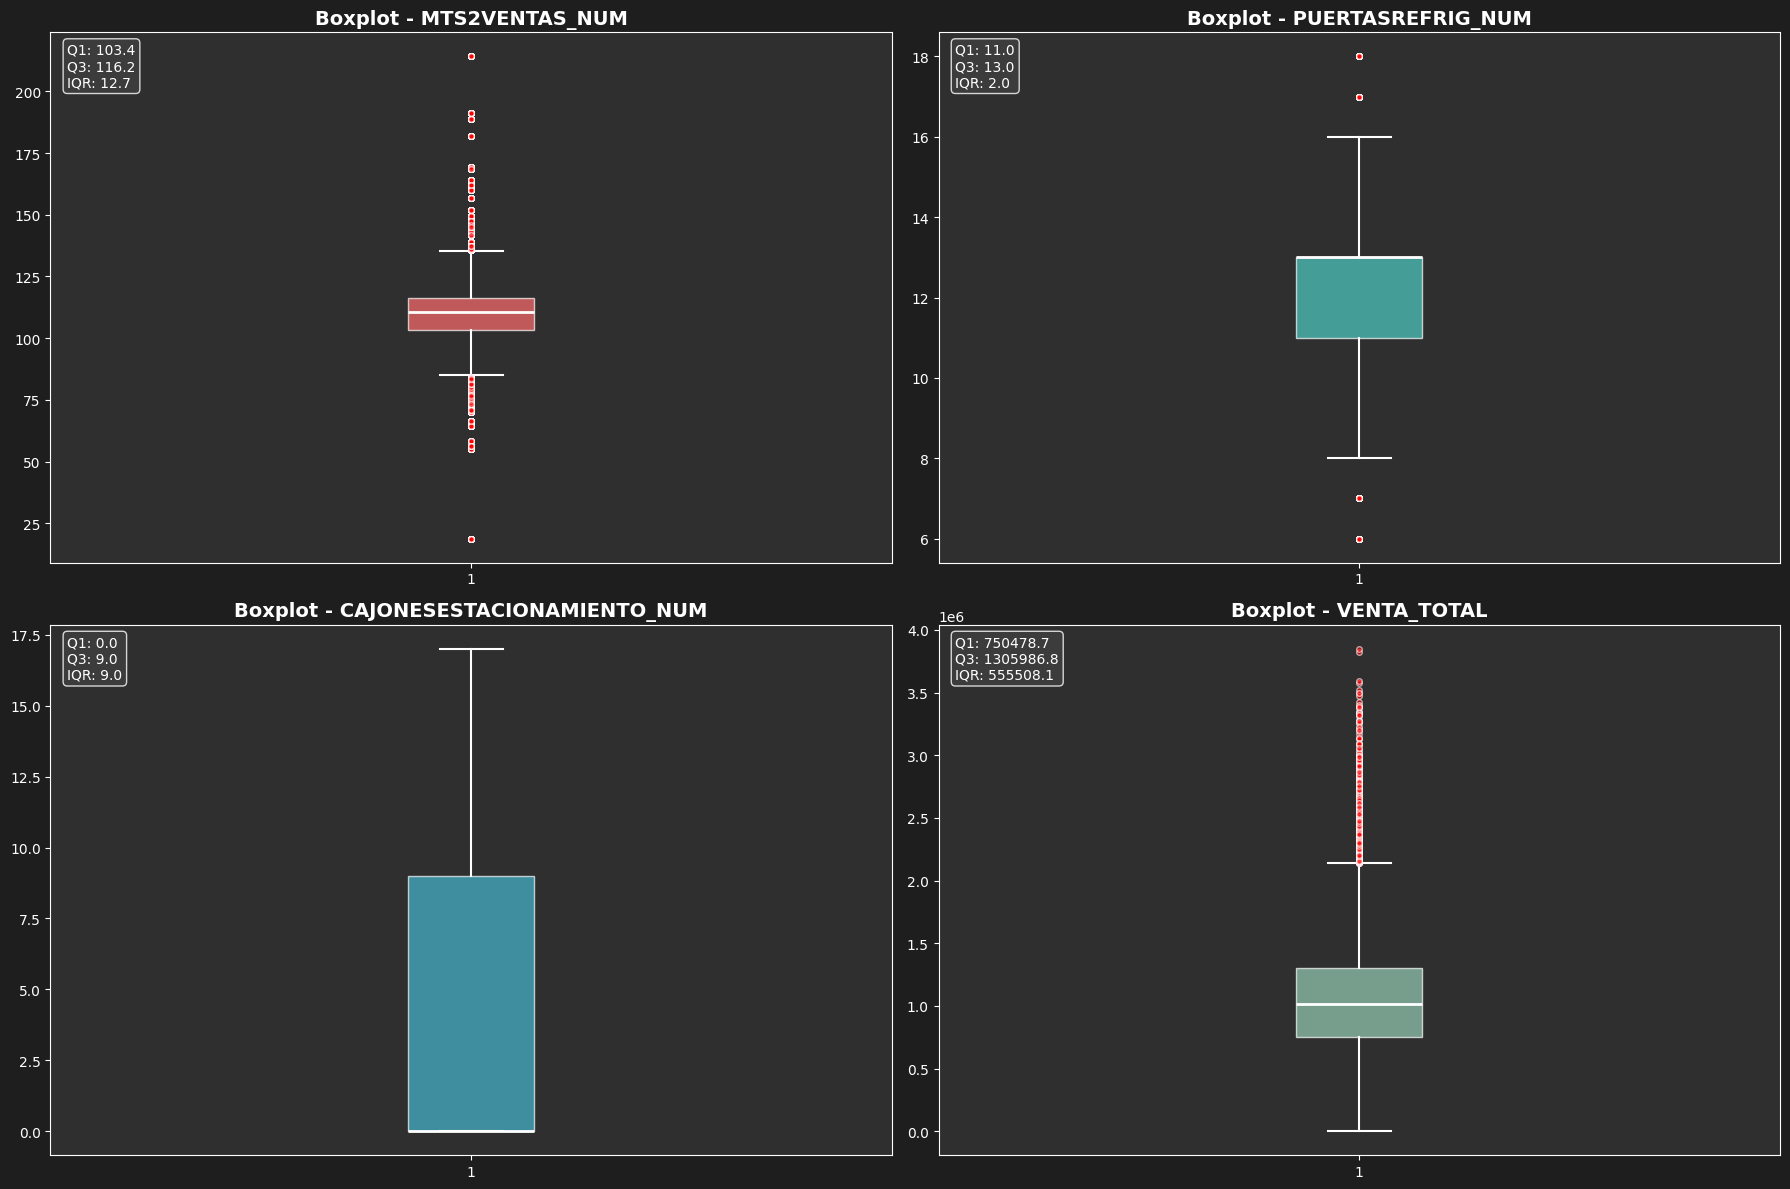

DETECCIÓN DE OUTLIERS:

MTS2VENTAS_NUM:
  Límite inferior: 84.37
  Límite superior: 135.22
  Outliers detectados: 1498 (7.8%)
  Valor mín: 18.72
  Valor máx: 214.20
  Outliers extremos: min=18.72, max=214.20

PUERTASREFRIG_NUM:
  Límite inferior: 8.00
  Límite superior: 16.00
  Outliers detectados: 168 (0.9%)
  Valor mín: 6.00
  Valor máx: 18.00
  Outliers extremos: min=6.00, max=18.00

CAJONESESTACIONAMIENTO_NUM:
  Límite inferior: -13.50
  Límite superior: 22.50
  Outliers detectados: 0 (0.0%)
  Valor mín: 0.00
  Valor máx: 17.00

VENTA_TOTAL:
  Límite inferior: -82783.39
  Límite superior: 2139248.92
  Outliers detectados: 351 (1.8%)
  Valor mín: 8.64
  Valor máx: 3848653.43
  Outliers extremos: min=2140972.06, max=3848653.43


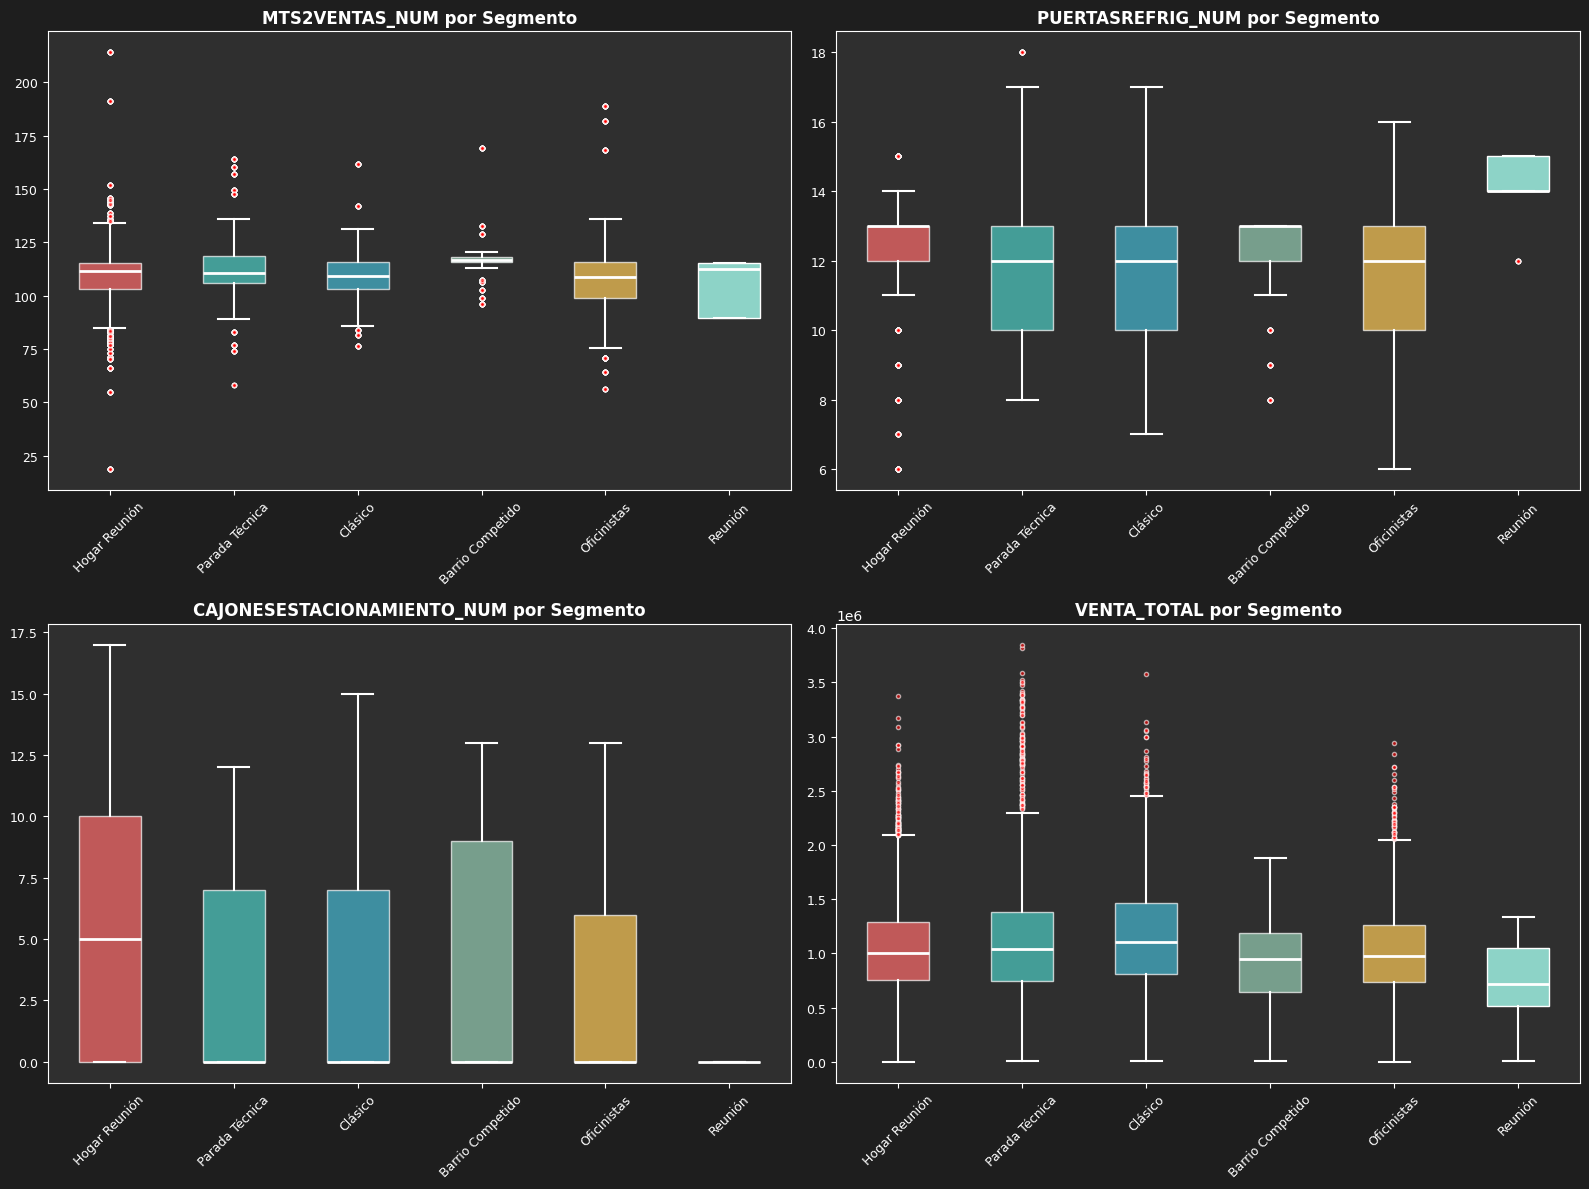

In [324]:
variables_numericas = ['MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_TOTAL']

# Configurar el estilo dark
plt.style.use('dark_background')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize = (18, 12))
axes = axes.ravel()

# Crear boxplot para cada variable
for i, variable in enumerate(variables_numericas):
   bp = axes[i].boxplot(df[variable].dropna(), patch_artist = True, 
                       boxprops = dict(facecolor = colors[i], alpha = 0.7),
                       medianprops = dict(color = 'white', linewidth = 2),
                       whiskerprops = dict(color = 'white', linewidth = 1.5),
                       capprops = dict(color = 'white', linewidth = 1.5),
                       flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 4, 
                                     markeredgecolor='white', alpha = 0.6))
   
   axes[i].set_title(f'Boxplot - {variable}', fontsize = 14, fontweight = 'bold', color = 'white')
   axes[i].tick_params(axis = 'y', labelsize = 10, colors = 'white')
   axes[i].set_facecolor('#2F2F2F')
   
   # Añadir estadísticas básicas
   q1 = df[variable].quantile(0.25)
   q3 = df[variable].quantile(0.75)
   iqr = q3 - q1
   
   axes[i].text(0.02, 0.98, f'Q1: {q1:.1f}\nQ3: {q3:.1f}\nIQR: {iqr:.1f}', 
               transform = axes[i].transAxes, verticalalignment = 'top',
               bbox = dict(boxstyle = 'round', facecolor = '#404040', alpha = 0.8, edgecolor = 'white'),
               color = 'white', fontsize = 10)

fig.patch.set_facecolor('#1E1E1E')
plt.tight_layout()
plt.show()

# Detectar outliers por variable
print("DETECCIÓN DE OUTLIERS:")
print("="*50)

for variable in variables_numericas:
   q1 = df[variable].quantile(0.25)
   q3 = df[variable].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   
   outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
   outliers_count = len(outliers)
   outliers_percent = (outliers_count / len(df)) * 100
   
   print(f"\n{variable}:")
   print(f"  Límite inferior: {lower_bound:.2f}")
   print(f"  Límite superior: {upper_bound:.2f}")
   print(f"  Outliers detectados: {outliers_count} ({outliers_percent:.1f}%)")
   print(f"  Valor mín: {df[variable].min():.2f}")
   print(f"  Valor máx: {df[variable].max():.2f}")
   
   if outliers_count > 0:
       print(f"  Outliers extremos: min={outliers[variable].min():.2f}, max={outliers[variable].max():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

variables_principales = ['MTS2VENTAS_NUM', 'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'VENTA_TOTAL']
segment_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

for i, variable in enumerate(variables_principales):
   # Obtener segmentos únicos
   segmentos = df['SEGMENTO_MAESTRO_DESC'].unique()
   
   # Crear datos para boxplot por segmento
   data_by_segment = [df[df['SEGMENTO_MAESTRO_DESC'] == seg][variable].dropna() 
                     for seg in segmentos]
   
   bp = axes[i].boxplot(data_by_segment, tick_labels = segmentos, patch_artist=True,
                       medianprops=dict(color='white', linewidth=2),
                       whiskerprops=dict(color='white', linewidth=1.5),
                       capprops=dict(color='white', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='red', markersize=3, 
                                     markeredgecolor='white', alpha=0.6))
   
   # Colorear cada box
   for patch, color in zip(bp['boxes'], segment_colors[:len(segmentos)]):
       patch.set_facecolor(color)
       patch.set_alpha(0.7)
   
   axes[i].set_title(f'{variable} por Segmento', fontsize=12, fontweight='bold', color='white')
   axes[i].tick_params(axis='x', rotation=45, labelsize=9, colors='white')
   axes[i].tick_params(axis='y', labelsize=9, colors='white')
   axes[i].set_facecolor('#2F2F2F')

fig.patch.set_facecolor('#1E1E1E')
plt.tight_layout()
plt.show()

## Datos demográficos

---

Durante la recopilación y análisis de datos demográficos se eliminaron 35 IDs ya que no permiten asociarlos a una sección demográfica. Es por eso que esos IDs también se eliminarán de 'df', para no generar discrepancias.

In [325]:
# Eliminar 35 IDs
ids_a_eliminar = [904, 961, 926, 927, 858, 932, 939, 657, 489,
                  569, 857, 168, 603, 742, 563, 339, 796, 99, 57,
                  53, 38, 41, 77, 605, 686, 522, 521, 814, 818, 721, 737, 734, 745, 874, 747, 853]

df = df[~df['TIENDA_ID'].isin(ids_a_eliminar)]

In [326]:
demo = pd.read_csv(f"{ruta}/tiendas_ageb_demografia.csv")
demo

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,...,POB15_64,PEA,PE_INAC,P12YM_CASA,P12YM_SOLT,P15YM_AN,P15YM_SE,P15PRI_CO,P15SEC_CO,P18YM_PB
0,1,2,C,Hogar,0.0,0,0,26.00177,-98.24284,Hogar Reunión,...,7872.0,6004.0,2900.0,5054.0,2900.0,98.0,151.0,1088.0,2956.0,3004.0
1,2,2,C,Hogar,0.0,0,0,26.04198,-98.35620,Hogar Reunión,...,11180.0,8292.0,3926.0,6502.0,4251.0,51.0,88.0,962.0,2626.0,7120.0
2,3,2,C,Hogar,0.0,0,0,26.02464,-98.26098,Hogar Reunión,...,3298.0,2297.0,1413.0,2124.0,1184.0,87.0,158.0,512.0,1109.0,1221.0
3,4,2,A,Hogar,0.0,0,0,26.04326,-98.23851,Hogar Reunión,...,7986.0,6106.0,3094.0,5012.0,3120.0,188.0,304.0,1218.0,2802.0,3062.0
4,5,2,C,Hogar,0.0,0,0,26.06397,-98.26165,Hogar Reunión,...,2289.0,1783.0,1034.0,1542.0,935.0,34.0,60.0,426.0,645.0,1073.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1052,2,B,Base,0.0,0,0,26.06517,-98.34480,Parada Técnica,...,1221.0,1021.0,614.0,1008.0,446.0,0.0,0.0,54.0,130.0,1235.0
911,1053,2,C,Hogar,0.0,0,0,26.04132,-98.29259,Hogar Reunión,...,2614.0,1927.0,1254.0,1731.0,1032.0,43.0,107.0,472.0,767.0,1119.0
912,1054,2,C,Hogar,0.0,0,0,26.09605,-98.29327,Hogar Reunión,...,4464.0,3490.0,1890.0,2790.0,1759.0,132.0,232.0,1367.0,1565.0,1185.0
913,1055,2,C,Hogar,0.0,0,0,26.01132,-98.38140,Hogar Reunión,...,4207.0,3254.0,1340.0,2744.0,1315.0,40.0,133.0,757.0,1663.0,1531.0


In [327]:
# Drop de las columnas repetidas
demo = demo.drop(['PLAZA_CVE', 'NIVELSOCIOECONOMICO_DES', 'ENTORNO_DES', 'MTS2VENTAS_NUM',
       'PUERTASREFRIG_NUM', 'CAJONESESTACIONAMIENTO_NUM', 'LATITUD_NUM',
       'LONGITUD_NUM', 'SEGMENTO_MAESTRO_DESC'], axis = 1)

In [328]:
# Merge con el df pasado con la variable 'tienda_id'
df_final = df.merge(demo, on = 'TIENDA_ID', how = 'left')

In [329]:
df_final

,TIENDA_ID,MES_ID,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,...,POB15_64,PEA,PE_INAC,P12YM_CASA,P12YM_SOLT,P15YM_AN,P15YM_SE,P15PRI_CO,P15SEC_CO,P18YM_PB
0,813,202404,1042761.16,2.0,C,Hogar,108.360000,12.0,0.0,25.99200,...,2162.0,1553.0,1069.0,1292.0,864.0,82.0,131.0,433.0,626.0,835.0
1,436,202404,2486787.81,3.0,BC,Hogar,111.437652,13.0,0.0,25.54982,...,904.0,644.0,359.0,606.0,339.0,12.0,13.0,56.0,181.0,615.0
2,732,202404,680701.78,5.0,C,Hogar,118.460000,15.0,0.0,25.75866,...,7080.0,5378.0,2102.0,5192.0,1892.0,31.0,33.0,441.0,2772.0,3370.0
3,282,202404,1227768.82,6.0,BC,Receso,114.000000,13.0,0.0,24.85018,...,2298.0,1516.0,1551.0,1586.0,1047.0,46.0,57.0,331.0,546.0,1441.0
4,704,202404,1052094.97,1.0,C,Base,107.230000,13.0,0.0,25.68419,...,3258.0,2376.0,1844.0,1954.0,1522.0,85.0,121.0,483.0,1062.0,1792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18569,233,202312,395789.12,4.0,C,Base,102.970000,13.0,10.0,25.66750,...,6716.0,4924.0,3120.0,4188.0,2749.0,117.0,186.0,863.0,2079.0,3521.0
18570,539,202312,1413451.87,6.0,B,Base,114.815000,13.0,0.0,25.69036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18571,885,202312,1157010.83,2.0,B,Receso,110.150000,10.0,9.0,25.98226,...,968.0,749.0,592.0,666.0,404.0,8.0,3.0,101.0,96.0,939.0
18572,793,202401,699916.91,6.0,C,Base,109.400000,13.0,0.0,25.19030,...,1635.0,1241.0,933.0,1022.0,721.0,47.0,108.0,250.0,499.0,839.0


In [330]:
df_final.isna().sum()

TIENDA_ID                     0
MES_ID                        0
VENTA_TOTAL                   0
PLAZA_CVE                     0
NIVELSOCIOECONOMICO_DES       0
ENTORNO_DES                   0
MTS2VENTAS_NUM                0
PUERTASREFRIG_NUM             0
CAJONESESTACIONAMIENTO_NUM    0
LATITUD_NUM                   0
LONGITUD_NUM                  0
SEGMENTO_MAESTRO_DESC         0
LID_UBICACION_TIENDA          0
DATASET                       0
Meta_venta                    0
EXITO                         0
POBTOT                        0
TOTHOG                        0
POCUPADA                      0
PDESOCUP                      0
P_18A24                       0
P_18A24_F                     0
P_18A24_M                     0
VPH_REFRI                     0
VPH_AUTOM                     0
VPH_PC                        0
VPH_NDACMM                    0
VPH_SINCINT                   0
P_12YMAS                      0
P_15YMAS                      0
P_15A49_F                     0
POB15_64